In [1]:
import sys
import numpy as np
import math
sys.path.append("../build/python")  # set to correct path for module
import varttpy

In [2]:
tmat=np.loadtxt("../examples/ex11_irlm/data/t_IRLM_NRG_N16_U-0.5_V0.15_Lambda2.0_ed0.0_Nkept200.dat")
Pmat=np.loadtxt("../examples/ex11_irlm/data/P_IRLM_NRG_N16_U-0.5_V0.15_Lambda2.0_ed0.0_Nkept200.dat")

In [3]:
model=varttpy.IRLM(tmat, Pmat, U=-0.5)
sol=varttpy.DMRG0(model.Ham())

In [4]:
sol.bond_dim=64
sol.nIter_diag=64
Npart=model.NParticle();
print("sweep energy Npart")
for i in range(10):
    sol.iterate()
    print(i+1, sol.energy, sol.Expectation(Npart))

cc=model.CalculateCiCj(sol.gs)
eval=np.sort( np.linalg.eigvals(cc) )

sweep energy Npart
1 -1.403685830655507 7.999999989414992
2 -1.4036858311897273 7.999999999999811
3 -1.403685831189951 7.999999999999803
4 -1.403685831189983 7.9999999999998215
5 -1.4036858311899965 7.999999999999791
6 -1.4036858311900051 7.999999999999795
7 -1.4036858311900142 7.999999999999805
8 -1.4036858311900264 7.999999999999813
9 -1.4036858311900307 7.999999999999813
10 -1.403685831190032 7.999999999999809


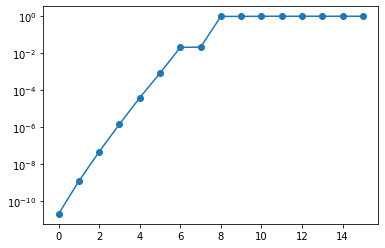

In [5]:
import matplotlib.pyplot as plt
plt.yscale('log')
plt.plot(eval, '-o')